In [11]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [12]:
# Load Dataset
df = pd.read_csv('StudentsPerformance (1).csv')

In [13]:
#  Display the first few rows of the data
print("First 5 rows of the dataset:\n")
print(df.head())


First 5 rows of the dataset:

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date  \
0        65.0           80.0           61.0             77.0          2021.0   
1        65.0           82.0           69.0             76.0          2018.0   
2        79.0           95.0           72.0            100.0          2019.0   
3        75.0           78.0            NaN             99.0          2019.0   
4        63.0           76.0           70.0             79.0          2018.0   

   Placement_Offer_Count  
0                    0.0  
1                    1.0  
2                    3.0  
3                    3.0  
4                    0.0  


In [14]:
# Scan Variables for Missing Values and Inconsistencies
# --------------------------------------------
print("\nChecking for missing values:\n")
print(df.isnull().sum())



Checking for missing values:

Math_Score               2
Reading_Score            1
Writing_Score            2
Placement_Score          1
Club_Join_Date           2
Placement_Offer_Count    1
dtype: int64


In [19]:
numeric_columns = ['Math_Score', 'Reading_Score', 'Writing_Score']

In [21]:
print(df.columns)


Index(['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score',
       'Club_Join_Date', 'Placement_Offer_Count'],
      dtype='object')


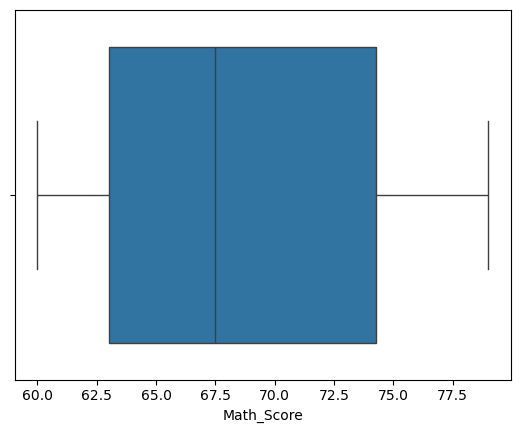

In [25]:
# Create the boxplot for the correct column name
sns.boxplot(x=df['Math_Score'])  # Use the correct column name here
plt.show()

In [52]:
# Detect outliers using Z-score method
z_scores = np.abs(stats.zscore(df[numeric_columns]))
outliers = (z_scores > 3)


Number of outliers detected in each column:

Math_Score       0
Reading_Score    0
Writing_Score    0
dtype: int64

 Outliers in Reading_Score:
 


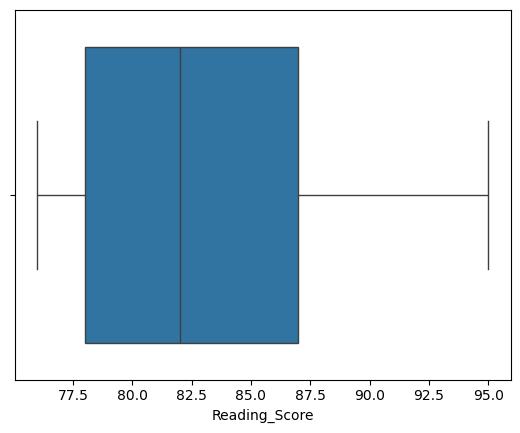

In [74]:
print("\nNumber of outliers detected in each column:\n")
print(pd.Series(np.sum(outliers, axis=0), index=numeric_columns))
print("\n Outliers in Reading_Score:\n ")
sns.boxplot(x=df['Reading_Score'])
plt.show()

In [56]:
# Handle outliers: Remove rows where any z-score > 3
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("\nShape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (0, 6)


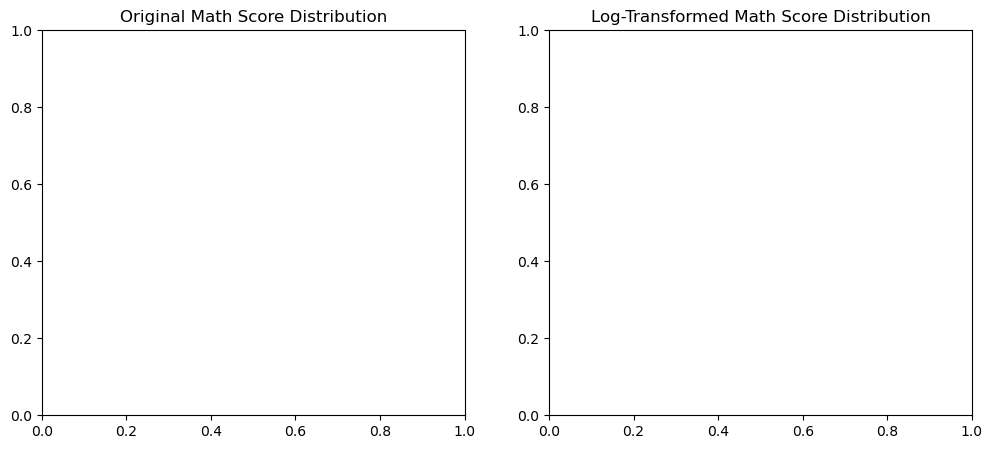

In [64]:
# Apply Data Transformation
# Transform 'math score' to reduce skewness using Log Transformation

# Note: Since log(0) is undefined, we add 1 before log transformation
df_no_outliers['Math_Score (log transformed)'] = np.log(df_no_outliers['Math_Score'] + 1)

# Plot original vs transformed distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['Math_Score'], kde=True, color='blue')
plt.title('Original Math Score Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['Math_Score (log transformed)'], kde=True, color='green')
plt.title('Log-Transformed Math Score Distribution')

plt.show()



In [66]:
 # Final Dataset Information
print("\nFinal Dataset after cleaning and transformation:\n")
print(df_no_outliers.head())

# Also check new data types
print("\nData types after transformation:\n")
print(df_no_outliers.dtypes)


Final Dataset after cleaning and transformation:

Empty DataFrame
Columns: [Math_Score, Reading_Score, Writing_Score, Placement_Score, Club_Join_Date, Placement_Offer_Count, Math_Score (log transformed)]
Index: []

Data types after transformation:

Math_Score                      float64
Reading_Score                   float64
Writing_Score                   float64
Placement_Score                 float64
Club_Join_Date                  float64
Placement_Offer_Count           float64
Math_Score (log transformed)    float64
dtype: object
